In [3]:
"""인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용하겠습니다.
이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 
각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있습니다.  
MNIST 데이터셋처럼 IMDB 데이터셋도 케라스에 포함되어 있습니다. 
이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있습니다. 
여기서 각 숫자는 사전에 있는 고유한 단어를 나타냅니다.  """

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
"""매개변수 `num_words=10000`은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미"""
# print(train_labels[0])

##############################################################################
"""재미 삼아 이 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 보겠습니다:"""
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다.

# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)
print(len(train_data[0])) #218
print(len(train_data[1])) #189


17473536/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\marbi\anaconda3\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\marbi\anaconda3\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype

1654784/1641221 [==============================] - 1s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [4]:
##############################################################################
import numpy as np

#원-핫인코딩
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results


# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print( y_train.shape) #(25000,)

(25000,)


In [5]:
##############################################################################
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy",
             metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20,
                   batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 22s 165ms/step - loss: 0.5806 - accuracy: 0.7220 - val_loss: 0.3832 - val_accuracy: 0.8730
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3222 - accuracy: 0.9017 - val_loss: 0.3074 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2206 - accuracy: 0.9313 - val_loss: 0.2852 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1718 - accuracy: 0.9502 - val_loss: 0.2719 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1394 - accuracy: 0.9566 - val_loss: 0.2784 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1126 - accuracy: 0.9677 - val_loss: 0.2907 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0922 - accuracy: 0.9755 - val_loss: 0.3230 - val_accuracy: 0.8823
Epoch 8/20


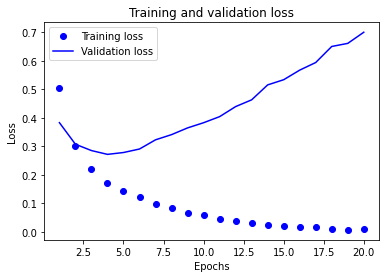

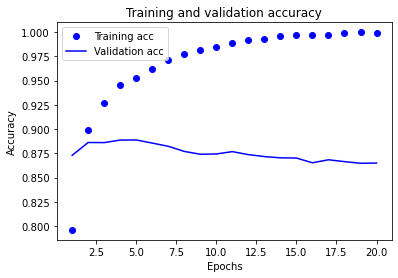

In [10]:
#############################################################
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()   # 그래프를 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

